In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("./대전광역시 유성구_지역화폐 발급월별 소비금액 지수 데이터_20220531.csv", encoding='CP949')

df["발급년"]=df["발급년"].astype(str)
df["발급월"]=df["발급월"].astype(str)

for i in range(2,3):
    df["발급월"+str(i)] = df["발급월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..
    
df["발급년월"] = df["발급년"] + df["발급월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

from datetime import datetime

df['발급년월']=df['발급년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

In [3]:
def change_age(text:str):
    return text[:2]

df['연령대'] = df['연령대'].map(change_age).astype(int)
df.head()

,발급년,발급월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,연령대,성별,지수_이용건수,지수_이용금액,발급월2,발급년월
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,30,여성,100.0,100.0,05,2020-05-01
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,40,여성,100.0,100.0,05,2020-05-01
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,30,남성,100.0,100.0,05,2020-05-01
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,40,여성,100.0,100.0,05,2020-05-01
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,30,남성,100.0,100.0,05,2020-05-01


In [ ]:
df = flights.pivot('month', 'year', 'passengers')df.head()


In [4]:
male_group = df[df['성별']=='남성'].groupby('연령대').sum()['지수_이용금액']
female_group = df[df['성별']=='여성'].groupby('연령대').sum()['지수_이용금액']

male_group2 = df[df['성별']=='남성'].groupby('연령대').sum()['지수_이용건수']
female_group2 = df[df['성별']=='여성'].groupby('연령대').sum()['지수_이용건수']


369.0740787829851

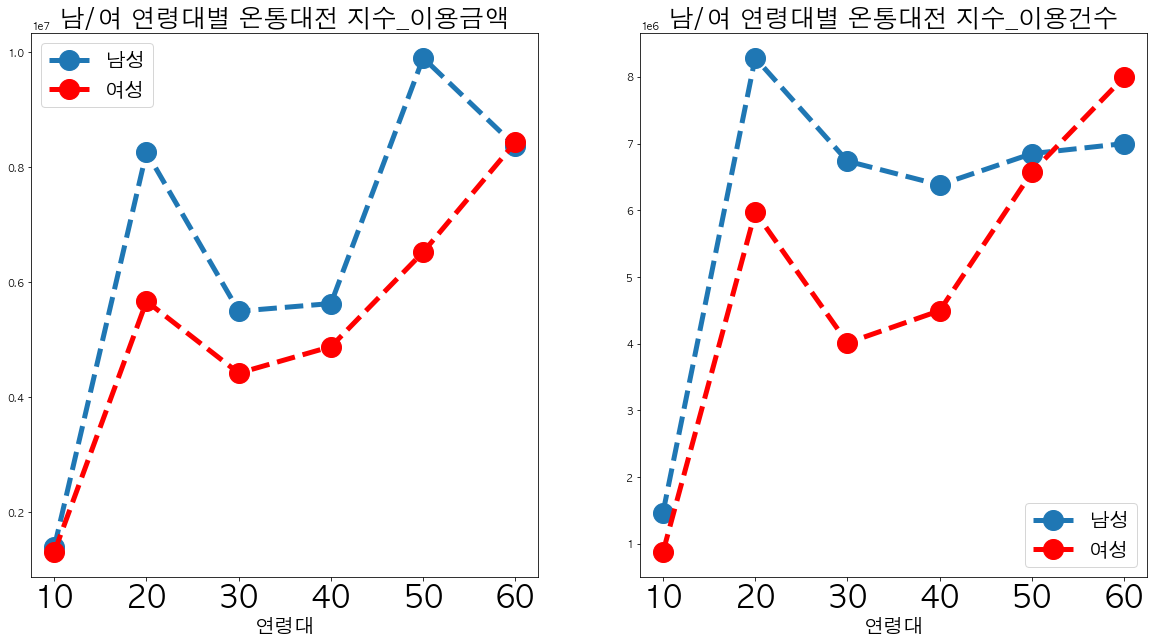

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(male_group.index,male_group,marker='o',markersize=20,linestyle='--',linewidth=5,label='남성')
plt.plot(female_group.index,female_group,color='red',marker='o',markersize=20,linestyle='--',linewidth=5,label='여성')
plt.xticks(fontsize=30)
plt.xlabel('연령대',fontsize=20)
plt.title("남/여 연령대별 온통대전 지수_이용금액",fontsize=25)
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.plot(male_group2.index,male_group2,marker='o',markersize=20,linestyle='--',linewidth=5,label='남성')
plt.plot(female_group2.index,female_group2,color='red',marker='o',markersize=20,linestyle='--',linewidth=5,label='여성')   
plt.xticks(fontsize=30)
plt.xlabel('연령대',fontsize=20)
plt.title('남/여 연령대별 온통대전 지수_이용건수',fontsize=25)
plt.legend(fontsize=20)

    
df['지수_이용금액'].mean()

In [6]:
#### Q. 왜 남자가 여자보다 더 많을까?
#### 전체 평균 지수_이용금액은 369